# Exercício - método de Newton

Considere o polinômio de Legendre de quinta ordem, mapeado em $-1 \leq x \leq 1$.

$$
P_5(x) = \frac 1 8 \left( 63 x^5 - 70 x^3 + 15 x \right).
$$

As raízes deste polinômio são os pontos de amostragem do método de integração da quadratura gaussiana, com $N = 5$.  Não existe uma fórmula geral para encontrar as raízes de um polinômio de quinta ordem, mas podemos encontrá-las facilmente usando um computador. O Método de Newton é muito usado para determinar as raízes deste tipo de polinômio.

**a.** Faça um gráfico de $P_5(x)$ no intervalos $-1 \leq x \leq 1$ e, de inspeção visual, guarde valores aproximados para as cinco raízes desse polinômio.

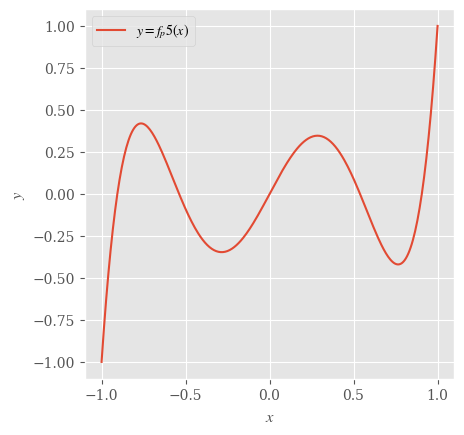

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_p5(x):
    return (63 * x**5 - 70 * x**3 + 15 * x)/8

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots()
x = np.linspace(-1, 1, 300)

ax.plot(x, f_p5(x), label=r'$y = f_p5(x)$')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

#chutes das raizes ao olhar o grafico:
#x1 = -1, x2 = -0.5, x3 = 0, x4 = 0.5, x5 = 1

**b.** Escreva um programa que encontre essas raízes com uma precisão de 10 casas decimais, usando o método de Newton. Compare o seu resultado com  o valor calculado usando o pacote `scipy`, para ter certeza que encontrou a solução.

In [2]:
from scipy.special import roots_legendre
xl, wl = roots_legendre(n=5)
print(f'resultado esperado: {xl}')

resultado esperado: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]


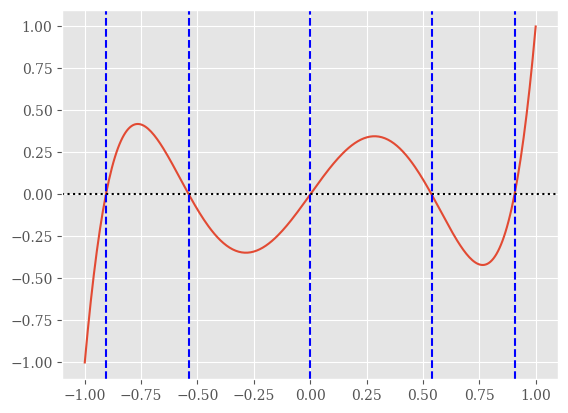

In [3]:
#calculando analiticamente f(x)/f'(x), obtemos a seguinte função
eps = 1e-10

def f(x1, eps):
    for n in range(100):
        x2 = x1 - (63 * x1**5 - 70 * x1**3 + 15*x1)/(315 * x1**4 - 210 * x1**2 + 15)
    
        if (abs(x2 - x1) < eps):
            return x2
        x1 = x2

fig, ax = plt.subplots()
ax.plot(x, f_p5(x))
ax.axhline(0.0, ls=':', color='k')

for x1 in [-1.0, -0.5, 0.0, 0.5, 1.0]: #aqui passamos os valores que inspecionamos visualmente no grafico
    r = f(x1, eps)
    ax.axvline(r, ls='--', color='b')
plt.show()